In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Collect Data

In [43]:
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


# EDA

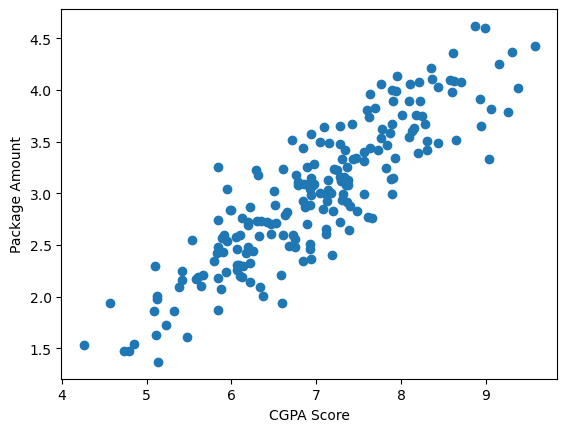

In [44]:
plt.scatter(df.cgpa,df.package)
plt.xlabel('CGPA Score')
plt.ylabel('Package Amount')
plt.show()

# Split Train And Test

In [45]:
X=df[['cgpa']]
y=df[['package']]

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=1)
xtrain.shape

(140, 1)

# Preprocesing

In [47]:
# 1. MIssing Values : No Mising values
xtrain.isnull().sum(),xtest.isnull().sum()

(cgpa    0
 dtype: int64,
 cgpa    0
 dtype: int64)

In [48]:
# Encoding since there is no categorical column no encoding required.
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 116 to 37
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    140 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [49]:
# Outliers of IDV: from Iqr method no outliers
xtrain.describe(),xtest.describe()

(             cgpa
 count  140.000000
 mean     6.986500
 std      1.063017
 min      4.260000
 25%      6.190000
 50%      6.965000
 75%      7.637500
 max      9.580000,
             cgpa
 count  60.000000
 mean    6.999833
 std     1.093163
 min     4.570000
 25%     6.197500
 50%     7.015000
 75%     7.790000
 max     9.380000)

In [50]:
cgpa_lower=4.260000-1.5*(7.737500-6.190000)
cgpa_upper=7.737500+1.5*(7.737500-6.190000)
print(cgpa_lower,cgpa_upper)

1.9387500000000006 10.05875


In [51]:
# Feature scaling: since only one variable(Simple Linear Regression) preprocessing not required.

# Build LinearRegression Model


In [52]:
Linearreg_model=LinearRegression()

In [54]:
Linearreg_model.fit(xtrain,ytrain)

LinearRegression()

In [56]:
y_pred=Linearreg_model.predict(xtest)

In [57]:
y_pred.shape

(60, 1)

# Model Evaluation

In [61]:
# test accuracy:  min accuracy required is >70.
r2_score(y_true=ytest,y_pred=y_pred)

0.7286201158620715

In [63]:
# train accuracy
y_train_pred=Linearreg_model.predict(xtrain)
r2_score(y_true=ytrain,y_pred=y_train_pred)

# varience of accuracy between test and train is <10 so no overfitting and test,train accuracy is >70 so no underfitting.

0.7924496222374815

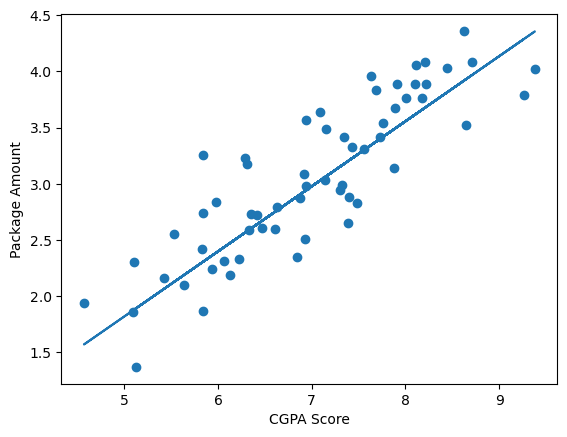

In [65]:
plt.scatter(xtest,ytest)
plt.plot(xtest,y_pred)
plt.xlabel('CGPA Score')
plt.ylabel('Package Amount')
plt.show()